In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from pylab import *

(17, 17)


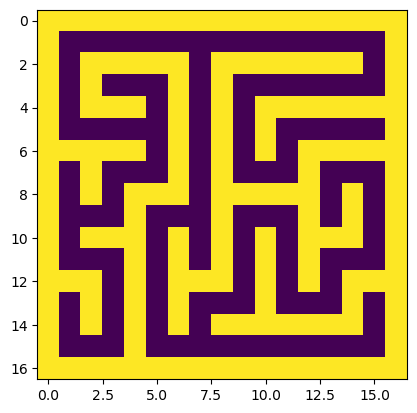

In [3]:
#Denhär koden genererar en random maze med width och height av 16 där 0 representerar väggar och 1 representerar paths.
def make_maze(w, h):
    #visited
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    #vertical
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    #horizontal
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]
#Här genereras en random path. 
    def walk(x, y):
        vis[y][x] = 1

        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
#Om en node redan har besökts så hoppar loopen över den och går vidare till nästa node.
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)
 
    walk(numpy.random.randint(w), numpy.random.randint(h))
# 's' sparar 'hor' & 'ver' variablerna som sedan används av M.
    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])
        
#'M' använder variablerna från 's' och skapar en lista som i sin tur blir själva mazen. 
    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M
 
maze=numpy.array(make_maze(8,8))
imshow(maze)

print(maze.shape)

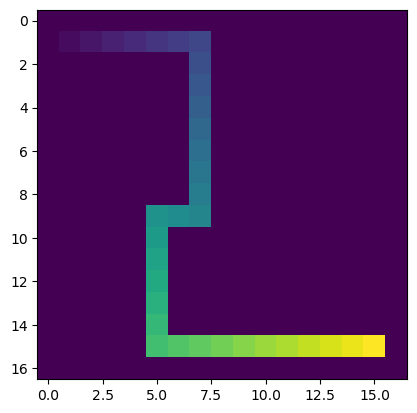

In [4]:
class Node:
#__init__ metoden används för att initziera attributen av instansen.
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0 #cost of reaching the node
        self.h = 0 #estimated cost to the end node
        self.f = 0 #total cost of the node
        
#'__eq__' metoden används för att jämföra nodes jämlikhet beroende på deras positioner.
    def __eq__(self, other):
        return self.position == other.position

#Denna funktion returnerar sökvägen från startnoden till slutnoden
#Den börjar från slutnoden och följer parents tillbaka till startnoden och skapar en lista av positions på vägen. 
#Denna lista kan vi sen använda för att räkna hur många steg som behövs för att komma i mål.
def return_path(current_node,maze):
    solve_path = []
    no_rows, no_columns = np.shape(maze)
    result = [[-1 for i in range(no_columns)] for j in range(no_rows)]
    current = current_node
    while current is not None:
        solve_path.append(current.position)
        current = current.parent
    solve_path = solve_path[::-1]
    start_value = 0

    for i in range(len(solve_path)):
        result[solve_path[i][0]][solve_path[i][1]] = start_value
        start_value += 1
    return result

#Här skapar vi startnoden och slutnoden och lägger till startnoden i en lista över noder att besöka. 
#Vi anger också ett maximalt antal iterationer för att förhindra att den körs på oändligt.
#Start och End har tre attribut, g, h och f, som håller koll på kostnaden för att nå målet.
#Sedan Går igenom listan över noder att besöka och flyttar dem till en lista med besökta noder.
def search(maze, cost, start, end):
    start_node = Node(None, tuple(start))
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, tuple(end))
    end_node.g = end_node.h = end_node.f = 0

    gonna_visit = []      
    visited = [] 
    gonna_visit.append(start_node)
    
    outer_iterations = 0
    max_iterations = (len(maze) // 2) ** 10
    move  =  [[-1, 0 ], # go up
              [ 0, -1], # go left
              [ 1, 0 ], # go down
              [ 0, 1 ]] # go right 

    no_rows, no_columns = np.shape(maze)
    
#Detta är main-loopen i algoritmen. Den söker tills den kommer i mål.
    while len(gonna_visit) > 0:
        outer_iterations += 1    
        
        current_node = gonna_visit[0]
        current_index = 0
        for index, item in enumerate(gonna_visit):
            if item.f < current_node.f:
                current_node = item
                current_index = index
                
#Här sätter vi ett maximalt antal iterationer så att den inte fortsätter oändligt utan att hitta målet.
        if outer_iterations > max_iterations:
            print ("GAME OVER")
            return return_path(current_node,maze)
        gonna_visit.pop(current_index)
        visited.append(current_node)

# Om målet är funnet - returnera pathen.
        if current_node == end_node:
            return return_path(current_node,maze)

# Genererar children från tidigare besökta nodes och filtrerar ut de children som ligger
# på en plats som inte får besökas.
        children = []

        for new_position in move: 
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            if (node_position[0] > (no_rows - 1) or 
                node_position[0] < 0 or 
                node_position[1] > (no_columns -1) or 
                node_position[1] < 0):
                continue

            if maze[node_position[0]][node_position[1]] != 0:
                continue
                
            new_node = Node(current_node, node_position)
            children.append(new_node)
# Söker igenom hela visited list efter eventuella children
        for child in children:
            if len([visited_child for visited_child in visited if visited_child == child]) > 0:
                continue
                
            # Skapar värden för 'f' 'g' och 'h'.
            child.g = current_node.g + cost
            child.h = (((child.position[0] - end_node.position[0]) ** 2) + 
                       ((child.position[1] - end_node.position[1]) ** 2)) 
            child.f = child.g + child.h

            if len([i for i in gonna_visit if child == i and child.g > i.g]) > 0:
                continue
            gonna_visit.append(child)

if __name__ == '__main__':    
    start = [1, 1] 
    end = [15,15] 
    cost = 1 

    path = search(maze, cost, start, end)
    imshow(path)